<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

‚≠ê Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [16]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

‚≠êRun the following code to read in the "cardio.csv" file.

In [2]:
df = pd.read_csv("cardio.csv", sep=";")

In [3]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df = df.sample(500, random_state=42)

In [8]:
df.shape

(500, 13)

In [9]:
df.describe()

id           age      gender      height      weight  \
count    500.000000    500.000000  500.000000  500.000000  500.000000   
mean   49656.324000  19460.940000    1.368000  164.746000   74.093400   
std    27694.652229   2444.264657    0.482744    8.017609   14.340822   
min      172.000000  14319.000000    1.000000  144.000000   43.000000   
25%    26990.500000  17804.000000    1.000000  159.000000   65.000000   
50%    49225.500000  19669.000000    1.000000  165.000000   72.000000   
75%    72126.500000  21326.250000    2.000000  170.000000   80.000000   
max    99934.000000  23670.000000    2.000000  198.000000  160.000000   

           ap_hi        ap_lo  cholesterol        gluc      smoke        alco  \
count  500.00000   500.000000   500.000000  500.000000  500.00000  500.000000   
mean   127.91200    98.908000     1.338000    1.192000    0.07800    0.046000   
std     40.82349   130.985839     0.651617    0.540111    0.26844    0.209695   
min   -120.00000     0.000000     1.000000    1.000000    0.00000    0.000000   
25%    120.00000    80.000000     1.000000    1.000000    0.00000    0.000000   
50%    120.00000    80.000000     1.000000    1.000000    0.00000    0.000000   
75%    140.00000    90.000000     1.000000    1.000000    0.00000    0.000000   
max    907.00000  1200.000000     3.000000    3.000000    1.00000    1.000000   

           active      cardio  
count  500.000000  500.000000  
mean     0.762000    0.492000  
std      0.426286    0.500437  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      1.000000    0.000000  
75%      1.000000    1.000000  
max      1.000000    1.000000

‚≠êLet's get rid of the outliers, moreover blood pressure could not be negative value!

In [13]:
df.set_index(['id'], inplace=True)


KeyError: "None of ['id'] are in the columns"

In [14]:
df.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                             
66728  21770       1     156    64.0    140     80            2     1      0   
69098  21876       1     170    85.0    160     90            1     1      0   
59185  23270       1     151    90.0    130     80            1     1      0   
49288  19741       1     159    97.0    120     80            1     1      0   
62481  18395       1     164    68.0    120     80            1     1      0   

       alco  active  cardio  
id                           
66728     0       1       1  
69098     0       1       1  
59185     0       1       1  
49288     0       1       1  
62481     0       1       0

In [19]:
df["age"] = np.round(df.age/365,2)
df.head(3)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                           
66728  0.0       1     156    64.0    140     80            2     1      0   
69098  0.0       1     170    85.0    160     90            1     1      0   
59185  0.0       1     151    90.0    130     80            1     1      0   

       alco  active  cardio  
id                           
66728     0       1       1  
69098     0       1       1  
59185     0       1       1

In [23]:
df["age"] = np.round(df.age/365)
df.head(3)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                           
66728  0.0       1     156    64.0    140     80            2     1      0   
69098  0.0       1     170    85.0    160     90            1     1      0   
59185  0.0       1     151    90.0    130     80            1     1      0   

       alco  active  cardio  
id                           
66728     0       1       1  
69098     0       1       1  
59185     0       1       1

## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

‚≠êWhat is the mean for Systolic blood pressure?

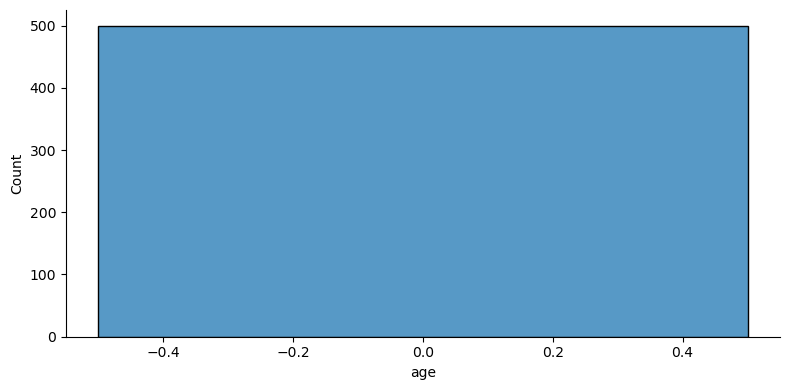

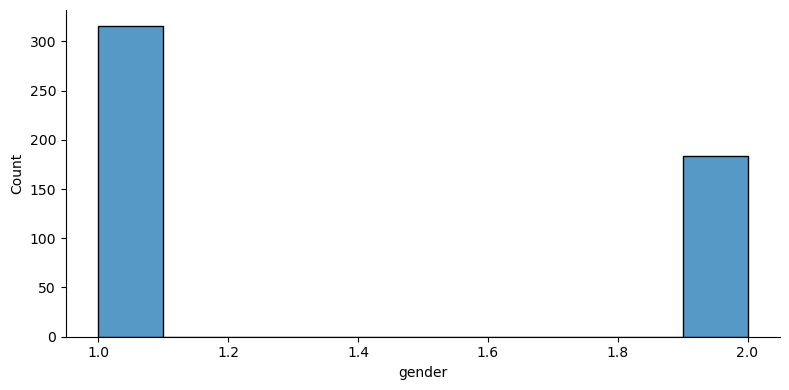

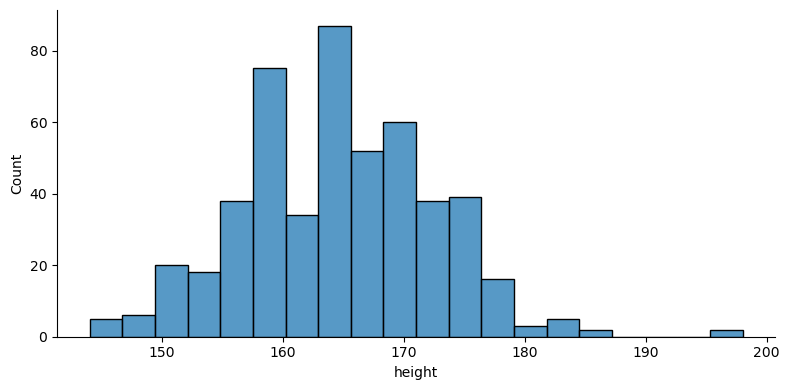

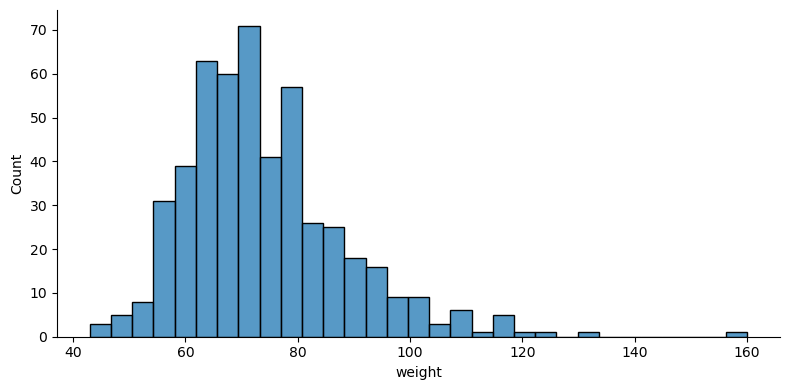

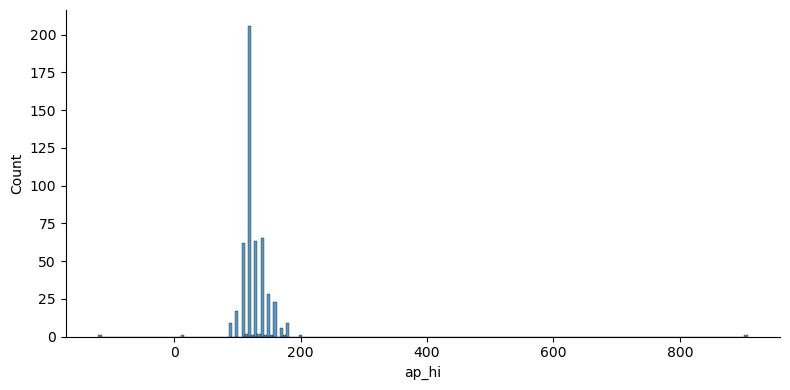

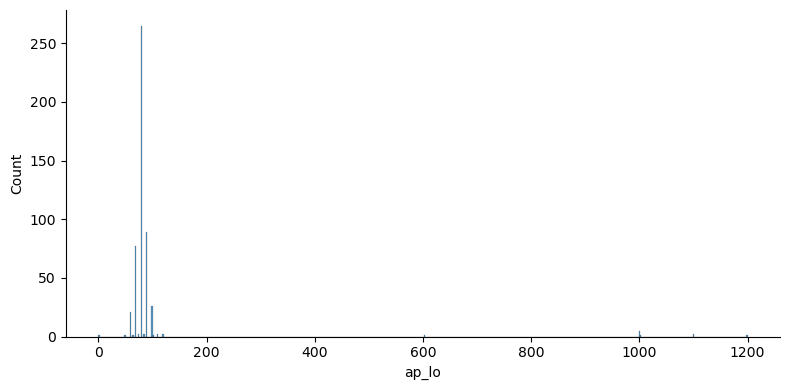

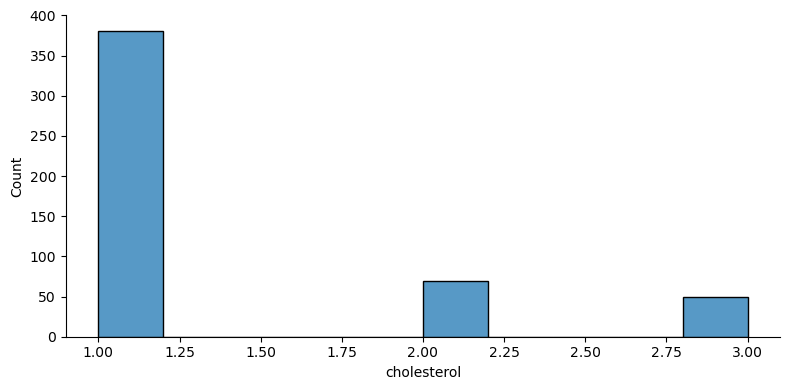

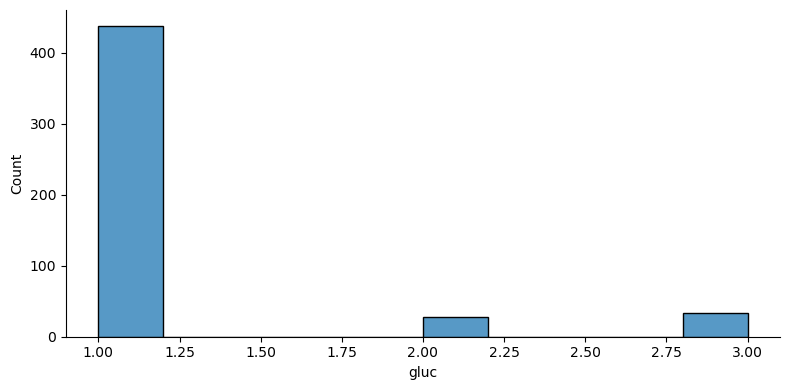

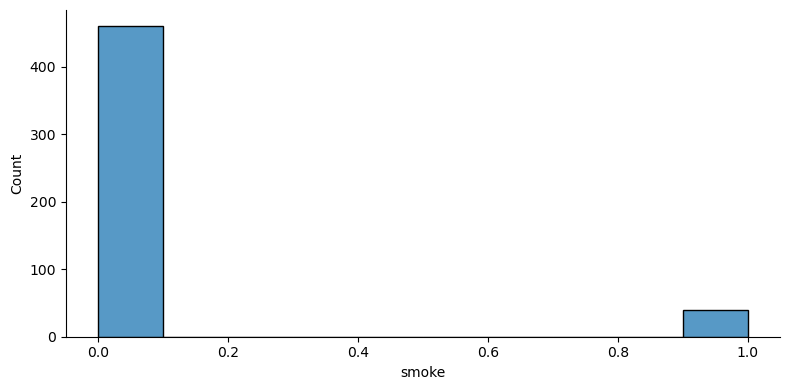

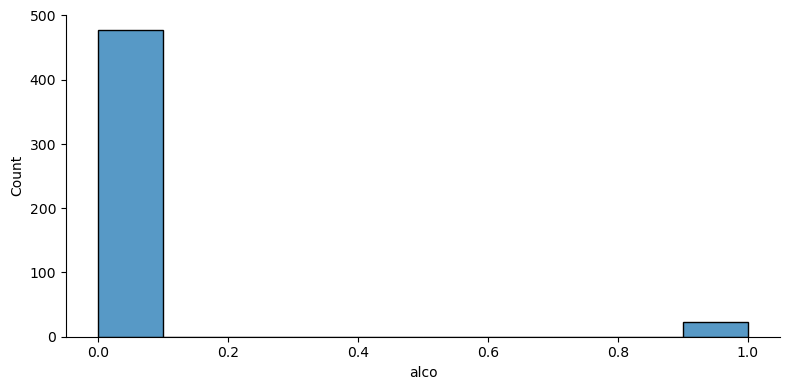

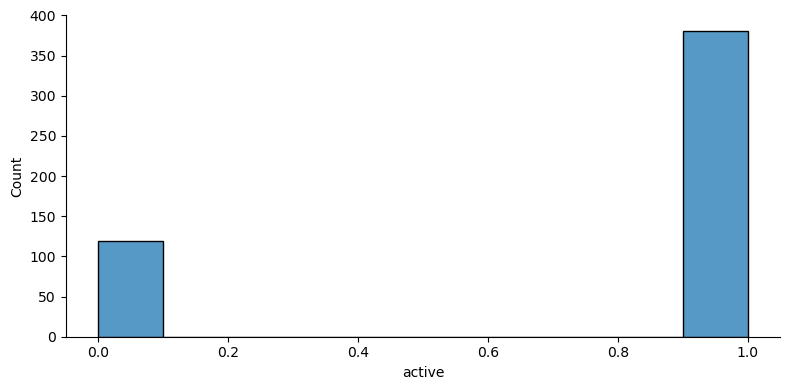

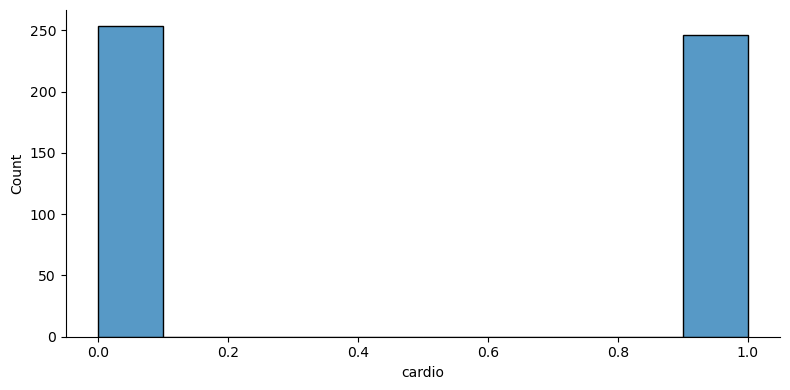

In [24]:
for col in df.columns:
    sns.displot(x=col, height=4, aspect=2, data=df)

‚≠êWhat is the standard deviation for Systolic blood pressure?

‚≠êWhat is the standard error of the mean for Systolic blood pressure?

‚≠êWhat are the descriptive statistics of the mean for Systolic blood pressure?

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

üí°A point estimate is a single number.

üí°A confidence interval, naturally, is an interval.

üí°Confidence intervals are the typical way to present estimates as an interval range.

üí°The point estimate is located exactly in the middle of the confidence interval.

üí°However, confidence intervals provide much more information and are preferred when making inferences.

üí°The more data you have, the less variable a sample estimate will be.

üí°The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

‚≠êInvestigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

## One Sample t Test

‚≠êInvestigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

üí°Assumptions

üí°Null and Alternative Hypothesis

üí°Test Statistic

üí°P-value

üí°Conclusion

Conduct the significance test. Use scipy.stats.ttest_1samp

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: ¬µ1 = ¬µ2 ("the two population means are equal")

H1: ¬µ1 ‚â† ¬µ2 ("the two population means are not equal")

‚≠êShow descriptives for 2 groups

___üöÄTest the assumption of homogeneity of variance Hint: Levene‚Äôs Test

The hypotheses for Levene‚Äôs test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

___üöÄConduct the significance test. Use scipy.stats.ttest_ind

H0: ¬µ1 = ¬µ2 ("the two population means are equal")

H1: ¬µ1 ‚â† ¬µ2 ("the two population means are not equal")

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

‚≠êDraw a boxplot to see the relationship.

‚≠êShow the descriptive statistics of 3 groups.

‚≠êConduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

‚≠êCreate a crosstab using Pandas.

‚≠êConduct chi-square test to see if there is a relationship between 2 categorical variables.